In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report,confusion_matrix
import seaborn as sns

In [14]:
# Load the dataset
df=pd.read_csv("Final_Dataset.csv")
df

# Convert 'time' to datetime format
df['time'] = pd.to_datetime(df['time'])


# Feature Engineering: Extracting date components
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour

# Drop unnecessary columns
df = df.drop(columns=['time', 'id', 'updated', 'place', 'type', 'locationSource', 'magSource', 'net', 'status','magType'])

# # Encode categorical data like 'magType'
# df = pd.get_dummies(df, columns=['magType'], drop_first=True)

# Check the first few rows
print(df.head())


# Create a binary target variable: 1 if mag > 5 (significant earthquake), else 0
df['target'] = np.where(df['mag'] > 5, 1, 0)

# Drop the original magnitude column




    latitude   longitude  depth   mag    nst    gap     dmin   rms  \
0  35.108833 -119.115000  11.98  4.60   49.0   50.0  0.05627  0.24   
1  35.109000 -119.097000  11.60  5.22  101.0   21.0  0.05144  0.26   
2  34.950333 -116.786667   7.26  4.89   53.0   57.0  0.18820  0.16   
3  34.057500 -118.907667  15.28  4.61  139.0  120.0  0.05360  0.28   
4  37.438167 -121.295833   3.51  4.53  174.0   91.0  0.05369  0.18   

   horizontalError  depthError  magError  magNst  year  month  day  hour  
0             0.22        0.79     0.118    30.0  2024      8    7     4  
1             0.19        0.78       NaN     6.0  2024      8    7     4  
2             0.14        0.72       NaN     6.0  2024      7   29    20  
3             0.23        0.28       NaN     6.0  2024      2    9    21  
4             0.17        0.50       NaN     5.0  2023      9   19     4  


Random Forest Classifier Accuracy: 1.0
Confusion Matrix:
 [[391   0]
 [  0 183]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       391
           1       1.00      1.00      1.00       183

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574

Support Vector Machine Accuracy: 0.9651567944250871
Confusion Matrix:
 [[389   2]
 [ 18 165]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       391
           1       0.99      0.90      0.94       183

    accuracy                           0.97       574
   macro avg       0.97      0.95      0.96       574
weighted avg       0.97      0.97      0.96       574

XGBoost Classifier Accuracy: 1.0
Confusion Matrix:
 [[391   0]
 [  0 183]]
Classification Report:
               precision 

C:\Users\Kushal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.2438 - val_loss: 0.0772
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0674 - val_loss: 0.0499
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0461 - val_loss: 0.0376
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0340 - val_loss: 0.0241
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0207 - val_loss: 0.0161
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0149 - val_loss: 0.0143
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097 - val_loss: 0.0123
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088 - val_loss: 0.0105
Epoch 9/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0062 - val_loss: 0.0079
Epoch 10/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055 - val_loss: 0.0088
Epoch 11/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032 - val_loss: 0.0054
Epoch 12/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023 - val_loss: 0.0067


C:\Users\Kushal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2849 - val_loss: 0.0623
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0697 - val_loss: 0.0362
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0461 - val_loss: 0.0232
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0305 - val_loss: 0.0166
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0221 - val_loss: 0.0128
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0172 - val_loss: 0.0089
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0154 - val_loss: 0.0101
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0127 - val_loss: 0.0062
Epoch 9/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085 - val_loss: 0.0076
Epoch 10/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0106 - val_loss: 0.0049
Epoch 11/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 - val_loss: 0.0047
Epoch 12/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 - val_loss: 0.0044


C:\Users\Kushal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Transformer Mean Squared Error: 0.0027621978013888464


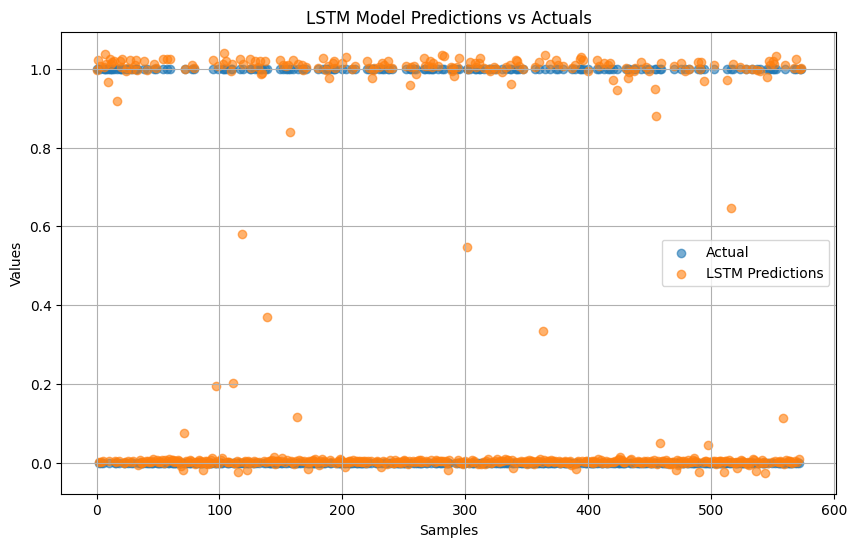

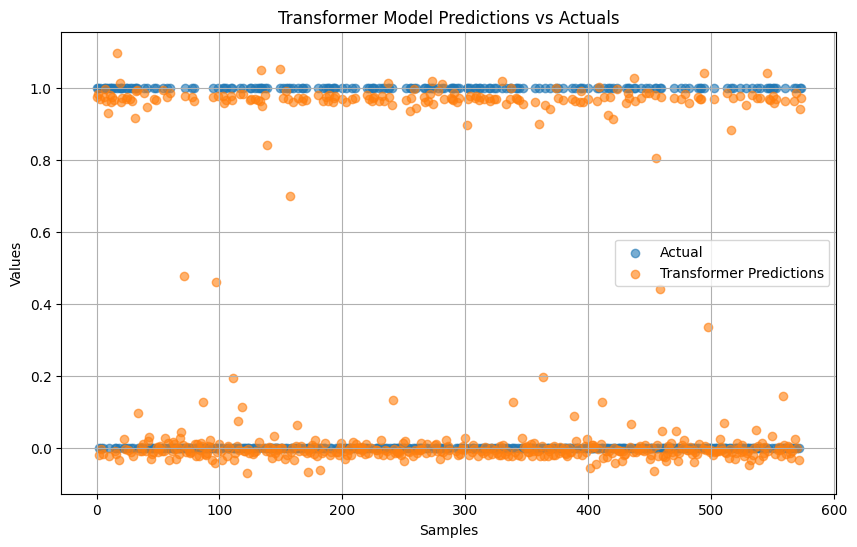

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Flatten


# Preprocessing: Handle missing values by filling them with the mean of the column
df.fillna(df.mean(), inplace=True)

# Define features and target (replace 'target' with your actual target column)
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation of Random Forest
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# 2. Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation of SVM
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# 3. XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation of XGBoost
print("XGBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# 4. LSTM for Time Series
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25, activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

# Predict and evaluate LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm)
lstm_mse = mean_squared_error(y_test, y_pred_lstm)
print("LSTM Mean Squared Error:", lstm_mse)

# 5. Transformer Model
X_train_transformer = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_transformer = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

def transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    attention = MultiHeadAttention(num_heads=4, key_dim=2)(inputs, inputs)
    attention = LayerNormalization(epsilon=1e-6)(attention)
    x = Flatten()(attention)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    return model

transformer = transformer_model(X_train_transformer.shape[1:])
transformer.compile(optimizer='adam', loss='mse')
transformer.fit(X_train_transformer, y_train, epochs=20, batch_size=32, validation_data=(X_test_transformer, y_test))

# Predict and evaluate Transformer
y_pred_transformer = transformer.predict(X_test_transformer)
transformer_mse = mean_squared_error(y_test, y_pred_transformer)
print("Transformer Mean Squared Error:", transformer_mse)

# Plotting LSTM Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_lstm)), y_pred_lstm, label='LSTM Predictions', alpha=0.6)
plt.title('LSTM Model Predictions vs Actuals')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Transformer Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_transformer)), y_pred_transformer, label='Transformer Predictions', alpha=0.6)
plt.title('Transformer Model Predictions vs Actuals')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
print(X.columns)

Index(['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms',
       'horizontalError', 'depthError', 'magError', 'magNst', 'year', 'month',
       'day', 'hour'],
      dtype='object')


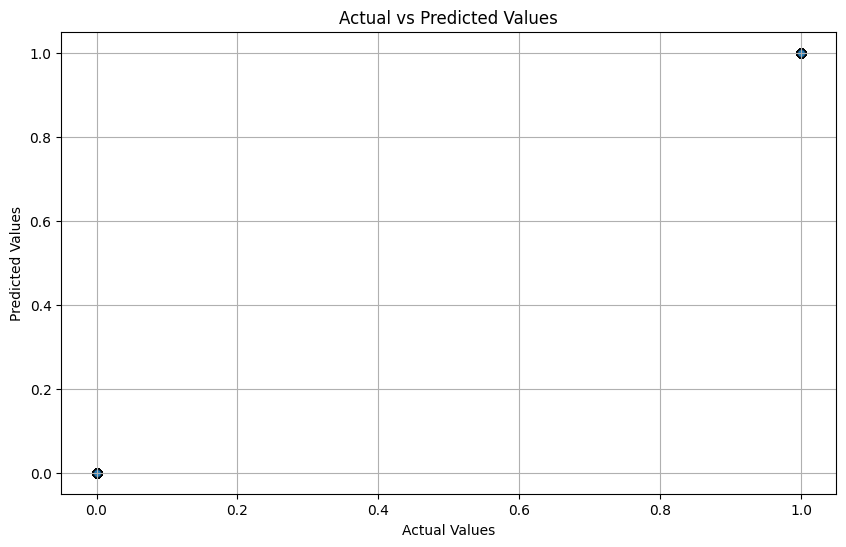

In [17]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(results['Actual'], results['Predicted'], alpha=0.6, edgecolor='k')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

Models saved successfully!
Random Forest (Loaded) Accuracy: 1.0
Support Vector Machine (Loaded) Accuracy: 0.9651567944250871
XGBoost (Loaded) Accuracy: 1.0


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
 1/18 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step

C:\Users\Kushal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\Kushal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
LSTM (Loaded) Mean Squared Error: 0.0040130500188288835
Transformer (Loaded) Mean Squared Error: <Functional name=functional_17, built=True>


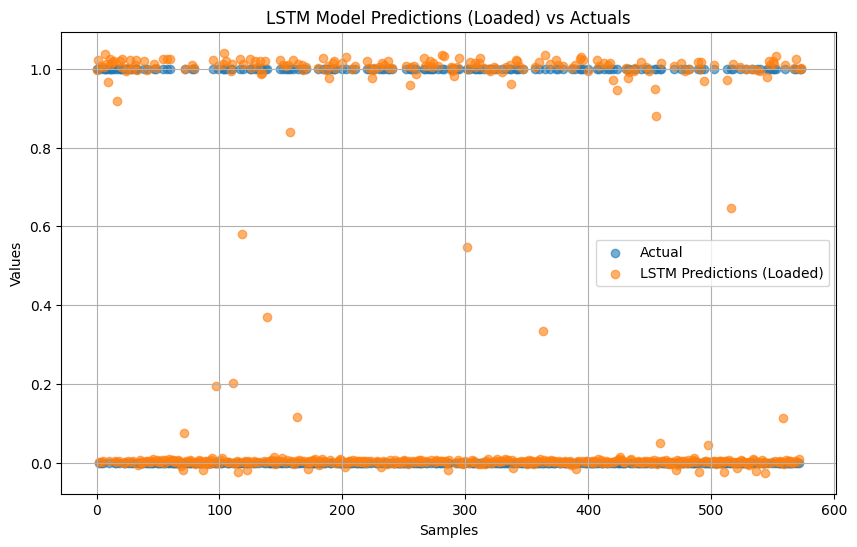

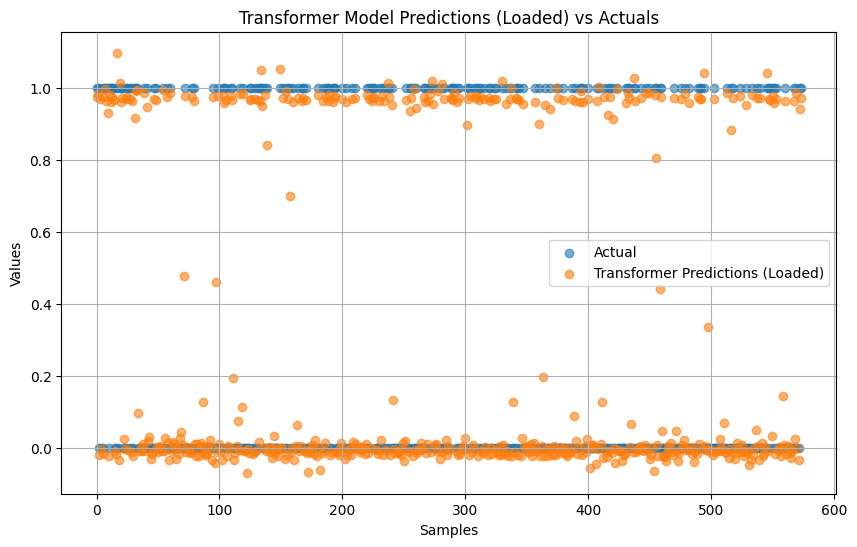

In [18]:
import joblib
from tensorflow.keras.models import load_model
from tensorflow.keras import losses

# Define file paths for saving models
rf_model_path = "models/random_forest_model.pkl"
svm_model_path = "models/svm_model.pkl"
xgb_model_path = "models/xgboost_model.pkl"
lstm_model_path = "models/lstm_model.h5"
transformer_model_path = "models/transformer_model.h5"

# 1. Save Tabular Models
joblib.dump(rf_model, rf_model_path)
joblib.dump(svm_model, svm_model_path)
joblib.dump(xgb_model, xgb_model_path)

# 2. Save Deep Learning Models
lstm_model.save(lstm_model_path)
transformer.save(transformer_model_path)

print("Models saved successfully!")

# -------------------------
# Load and Evaluate Models
# -------------------------

# 1. Load Tabular Models
rf_model_loaded = joblib.load(rf_model_path)
svm_model_loaded = joblib.load(svm_model_path)
xgb_model_loaded = joblib.load(xgb_model_path)

# Evaluate Tabular Models
y_pred_rf_loaded = rf_model_loaded.predict(X_test)
y_pred_svm_loaded = svm_model_loaded.predict(X_test)
y_pred_xgb_loaded = xgb_model_loaded.predict(X_test)

RF_ACCURACY = accuracy_score(y_test, y_pred_rf_loaded)
SVM_ACCURACY = accuracy_score(y_test, y_pred_svm_loaded)
XSBOOST_ACCURACY = accuracy_score(y_test, y_pred_xgb_loaded)

print("Random Forest (Loaded) Accuracy:", RF_ACCURACY)
print("Support Vector Machine (Loaded) Accuracy:", SVM_ACCURACY)
print("XGBoost (Loaded) Accuracy:", XSBOOST_ACCURACY)

# 2. Load Deep Learning Models
lstm_model_loaded = load_model(lstm_model_path)
transformer_model_loaded = load_model(transformer_model_path, custom_objects={'mse': losses.MeanSquaredError()})

# Evaluate Deep Learning Models
y_pred_lstm_loaded = lstm_model_loaded.predict(X_test_lstm)
y_pred_transformer_loaded = transformer_model_loaded.predict(X_test_transformer)

lstm_mse = mean_squared_error(y_test, y_pred_lstm_loaded)
transformer_mse = mean_squared_error(y_test, y_pred_transformer_loaded)

print("LSTM (Loaded) Mean Squared Error:", lstm_mse)
print("Transformer (Loaded) Mean Squared Error:", transformer)

# Plot LSTM Predictions vs Actual (Loaded Model)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_lstm_loaded)), y_pred_lstm_loaded, label='LSTM Predictions (Loaded)', alpha=0.6)
plt.title('LSTM Model Predictions (Loaded) vs Actuals')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Plot Transformer Predictions vs Actual (Loaded Model)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_transformer_loaded)), y_pred_transformer_loaded, label='Transformer Predictions (Loaded)', alpha=0.6)
plt.title('Transformer Model Predictions (Loaded) vs Actuals')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

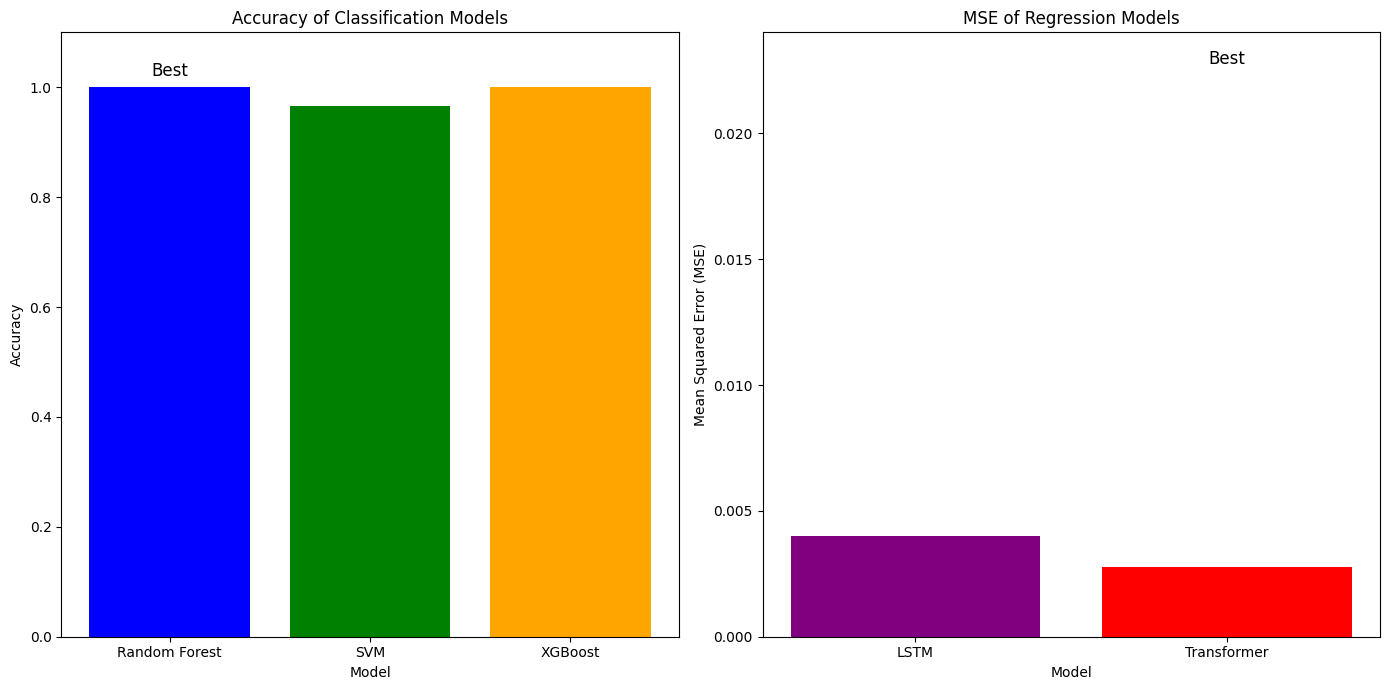

In [19]:
import matplotlib.pyplot as plt

# Accuracy of the Classification models
models = ['Random Forest', 'SVM', 'XGBoost']
accuracy_scores = [RF_ACCURACY, SVM_ACCURACY, XSBOOST_ACCURACY]  # Replace with your actual accuracy results

# MSE of the Regression models
regression_models = ['LSTM', 'Transformer']
mse_scores = [lstm_mse, transformer_mse]  # Replace with your actual MSE results

# Plotting the accuracy scores
plt.figure(figsize=(14, 7))

# Subplot for Classification Model Accuracy
plt.subplot(1, 2, 1)
bars = plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange'])
plt.title('Accuracy of Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Mark the best classification model
best_accuracy_index = accuracy_scores.index(max(accuracy_scores))  # Find index of best accuracy
plt.text(best_accuracy_index, accuracy_scores[best_accuracy_index] + 0.02, 'Best', ha='center', fontsize=12, color='black')

# Increase y-axis range to make the bars more prominent
plt.ylim(0, max(accuracy_scores) + 0.1)

# Subplot for Regression Model MSE
plt.subplot(1, 2, 2)
bars_mse = plt.bar(regression_models, mse_scores, color=['purple', 'red'])
plt.title('MSE of Regression Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')

# Mark the best regression model
best_mse_index = mse_scores.index(min(mse_scores))  # Find index of best MSE (lowest value)
plt.text(best_mse_index, mse_scores[best_mse_index] + 0.02, 'Best', ha='center', fontsize=12, color='black')

# Increase y-axis range to make the bars more prominent
plt.ylim(0, max(mse_scores) + 0.02)

plt.tight_layout()
plt.show()

In [29]:
import numpy as np
import pandas as pd

# Example custom input (ensure this matches the training feature order and scaling)
custom_input = np.array([[35.6895, -139.6917, 10.0, 4.5, 20, 90, 0.5, 1.2,
                          0.3, 0.4, 0.2, 10, 2025, 1, 1, 12]])  # Replace with your values

# Convert to DataFrame (optional, for tabular models requiring DataFrames)
custom_input_df = pd.DataFrame(custom_input, columns=[
    'latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms',
    'horizontalError', 'depthError', 'magError', 'magNst', 'year', 'month',
    'day', 'hour'
])

# Preprocess the input (e.g., scaling, if required)
# Replace `scaler` with your actual scaler used during training
# custom_input_scaled = scaler.transform(custom_input)  # Uncomment if scaling is used

# For simplicity, assuming no additional scaling is needed
custom_input_scaled = custom_input

# Predictions with Tabular Models (convert DataFrame to NumPy for sklearn models)
custom_input_np = custom_input_df.to_numpy()

rf_prediction = rf_model_loaded.predict(custom_input_np)
svm_prediction = svm_model_loaded.predict(custom_input_np)
xgb_prediction = xgb_model_loaded.predict(custom_input_np)

print("Random Forest Prediction:", rf_prediction)
print("SVM Prediction:", svm_prediction)
print("XGBoost Prediction:", xgb_prediction)

# Reshape input for LSTM (LSTM expects input in 3D: (samples, timesteps, features))
custom_input_lstm = custom_input_scaled.reshape((1, 1, custom_input_scaled.shape[1]))  # Reshape to (1, 1, features)
lstm_prediction = lstm_model_loaded.predict(custom_input_lstm)
print("LSTM Prediction:", lstm_prediction)

# Reshape to match the model's expected input shape (batch_size=1, sequence_length=1, n_features)
custom_input_reshaped = custom_input.reshape(1, 1, custom_input.shape[1])  # (1, 1, 16)

# Make a prediction
transformer_prediction = transformer_model_loaded.predict(custom_input_reshaped)
print("Transformer Prediction:", transformer_prediction)


Random Forest Prediction: [1]
SVM Prediction: [0]
XGBoost Prediction: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
LSTM Prediction: [[0.748496]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Transformer Prediction: [[0.5371972]]
